# Introduction
This notebook is to show how easy it is to use pysportsref. First, we construct an aging curve for NBA players in as few lines as possible. Next, we walk through a more detailed breakdown of the steps we took to get there. Finally, we construct aging curves for NFL and NHL players using a combination of predefined functions and more detailed walk through.

In [1]:
%matplotlib inline
from pysportsref.transform import get_player_totals, merge_with_prev_year
from pysportsref import basketball
from pysportsref.stats import calculate_aging_curve

/Users/harrisonchase/workplace/pysportsref/.venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Easy fetching of stats

In [2]:
all_df = basketball.get_advanced_stats(2000, 2019)

100%|██████████| 20/20 [01:05<00:00,  3.29s/it]


In [4]:
filtered_df = get_player_totals(all_df)

merged_df = merge_with_prev_year(filtered_df, 1)

age_curve = calculate_aging_curve(merged_df, 'bpm', 'mp')

/Users/harrisonchase/workplace/pysportsref/pysportsref/stats.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (df['diff'] * df['weight_avg']).sum() / df['weight_avg'].sum()


### Plot BPM Aging Curve

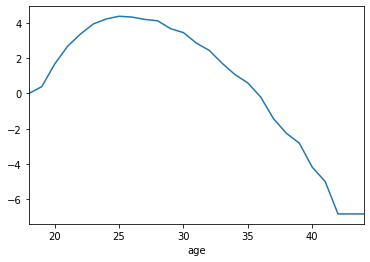

In [5]:
age_curve.plot()

### We can do the same for a variety of other stats

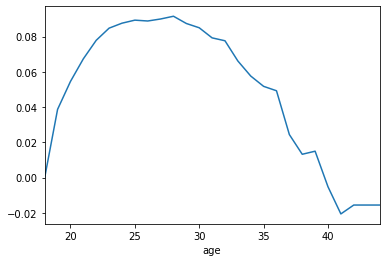

In [6]:
# True shooting percentage
age_curve = calculate_aging_curve(merged_df, 'ts_pct', 'mp')
age_curve.plot()

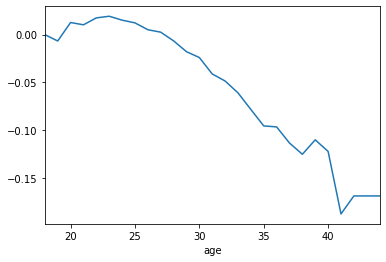

In [7]:
# Free throw attempts per field goal attempt
age_curve = calculate_aging_curve(merged_df, 'fta_per_fga_pct', 'mp')
age_curve.plot()

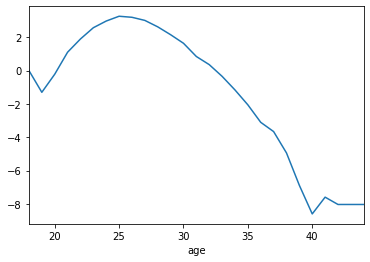

In [8]:
# Usage percent
age_curve = calculate_aging_curve(merged_df, 'usg_pct', 'mp')
age_curve.plot()

## More detailed example
Above, we used some predefined functions to fetch the data. While one purpose of this library is to expose functions like that, another purpose is to make doing that on pages not indexed by the library easy. Here is an example what that process looks like from helper functions.

1) Find some url that has information you want to get

In [9]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_advanced.html'

2) Get the BeautifulSoup object of that page

In [10]:
from pysportsref.scraping import get_soup
soup = get_soup(url)

3) See what tables are available for parsing

In [11]:
from pysportsref.parsing import list_tables
list_tables(soup)

['advanced_stats']

4) Make the url into something we can format with the year

In [12]:
url_formatter = 'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'

5) Call a generic function to loop over desired years on desired url format and get desired table

In [13]:
from pysportsref.scraping import get_stats_for_years

all_df = get_stats_for_years(
    url_formatter,
    2000,  # start year
    2019,  # end year
    'advanced_stats',  # table name, known from above
)

100%|██████████| 20/20 [01:00<00:00,  3.00s/it]


This is now the same as what we had before! We can calculate the same aging curve

/Users/harrisonchase/workplace/pysportsref/pysportsref/stats.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (df['diff'] * df['weight_avg']).sum() / df['weight_avg'].sum()


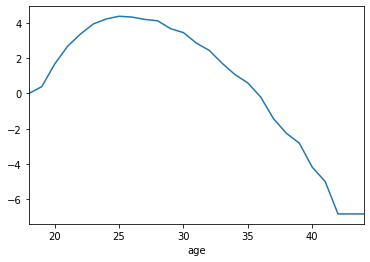

In [15]:
filtered_df = get_player_totals(all_df)

merged_df = merge_with_prev_year(filtered_df, 1)

age_curve = calculate_aging_curve(merged_df, 'bpm', 'mp')

age_curve.plot()

### NFL Aging Curves
Lets use some predefined data fetchers to calculate aging curves for NFL players

In [16]:
from pysportsref import football

In [17]:
passing_df = football.get_stats('passing', 1980, 2019)

100%|██████████| 40/40 [00:39<00:00,  1.00it/s]


In [18]:
merged_df = merge_with_prev_year(passing_df, 1)

In [19]:
nfl_aging_curve = calculate_aging_curve(merged_df, 'pass_rating', 'pass_att')

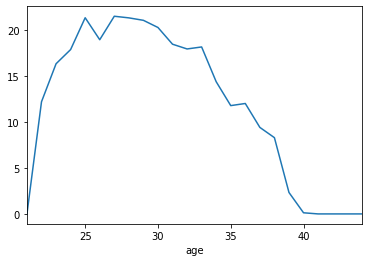

In [20]:
nfl_aging_curve.clip(0).plot()

In [21]:
rushing_df = football.get_stats('rushing', 1980, 2019)

100%|██████████| 40/40 [00:53<00:00,  1.35s/it]


In [22]:
merged_df = merge_with_prev_year(rushing_df, 1)

In [23]:
merged_df.columns

Index(['age', 'fumbles', 'g', 'gs', 'player', 'player_url', 'pos', 'ranker',
       'rush_att', 'rush_long', 'rush_td', 'rush_yds', 'rush_yds_per_att',
       'rush_yds_per_g', 'team', 'team_url', 'year', 'age___1', 'fumbles___1',
       'g___1', 'gs___1', 'player___1', 'pos___1', 'ranker___1',
       'rush_att___1', 'rush_long___1', 'rush_td___1', 'rush_yds___1',
       'rush_yds_per_att___1', 'rush_yds_per_g___1', 'team___1',
       'team_url___1'],
      dtype='object')

In [24]:
nfl_aging_curve = calculate_aging_curve(merged_df, 'rush_yds', 'g')

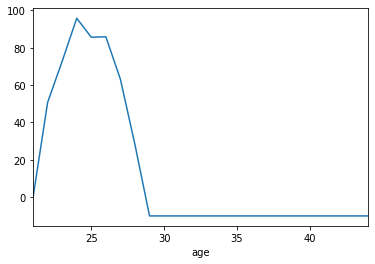

In [25]:
nfl_aging_curve.clip(-10).plot()

### Calculate aging curve for hockey players
We don't have any methods for fetching data in the library yet, so have to do this the old fashion way

In [26]:
url = 'https://www.hockey-reference.com/leagues/NHL_2019_skaters.html'

In [27]:
soup = get_soup(url)
list_tables(soup)

['stats']

In [28]:
url_formatter = 'https://www.hockey-reference.com/leagues/NHL_{year}_skaters.html'

In [29]:
stats = get_stats_for_years(url_formatter, 2010, 2019, 'stats')

100%|██████████| 10/10 [00:55<00:00,  5.53s/it]


In [30]:
stats['points_per_100'] = stats['points'] / stats['time_on_ice'] * 100

In [31]:
nhl_df = merge_with_prev_year(stats, 1)

In [32]:
nhl_aging_curve = calculate_aging_curve(nhl_df, 'points_per_100', 'time_on_ice')

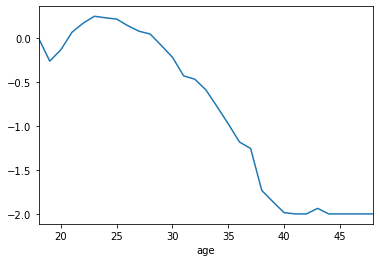

In [33]:
nhl_aging_curve.clip(-2).plot()